In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
%matplotlib inline

In [85]:
input_data=np.array([[0,0,0],
            [0,1,0],
            [0,0,1],
            [1,0,0],
            [1,0,1],
            [1,1,1]])

In [86]:
output_data=np.array([[0],[1],[1],[1],[0],[1]])

In [87]:
def sigmoid(x):
    return (1)/(1+np.exp(-x))

In [88]:
def dsigmoid(x):
    return x*(1-x)

In [105]:
np.random.seed(3)
w0=np.random.random((3,4))-1

In [106]:
w0

array([[-0.4492021 , -0.29185218, -0.70909526, -0.48917239],
       [-0.10705305, -0.10370691, -0.87441469, -0.79275712],
       [-0.9485328 , -0.55919016, -0.97012379, -0.54316678]])

In [109]:
w1=np.random.random((4,2))-1

In [110]:
w1

array([[-0.71647492, -0.30686208],
       [-0.55954628, -0.84313226],
       [-0.45535098, -0.21968524],
       [-0.69363647, -0.77804212]])

In [111]:
w2=np.random.random((2,1))-1

In [112]:
w2

array([[-0.61202874],
       [-0.06361635]])

In [113]:
b0=np.random.random((1,1))-1
b1=np.random.random((1,1))-1
b2=np.random.random((1,1))-1

In [115]:
def feed_forward(data_in,w0,w1,w2,b0,b1,b2):
    layer0=data_in
    layer1=sigmoid(np.dot(layer0,w0)+b0)
    layer2=sigmoid(np.dot(layer1,w1)+b1)
    layer3=sigmoid(np.dot(layer2,w2)+b2)
    
    return layer0,layer1,layer2,layer3


In [120]:
def back_propogation(layer0,layer1,layer2,layer3,actual_y,w0,w1,w2,b0,b1,b2,learning_rate,i):
    l3_error=layer3-actual_y
    l3_delta=l3_error*dsigmoid(layer3)
    dh3=np.dot(layer2.T,l3_delta)#delta w3 
    
    
    l2_error=np.dot(l3_delta,w2.T)
    l2_delta=l2_error *dsigmoid(layer2)
    dh2=np.dot(layer1.T,l2_delta)
    
    l1_error=np.dot(l2_delta,w1.T)
    l1_delta=l1_error* dsigmoid(layer1)#weights
    dh1=np.dot(layer0.T,l1_delta)
    
    
    w2=w2-(learning_rate*dh3)
    w1=w1-(learning_rate * dh2)
    w0=w0-(learning_rate* dh1)
    
    b2=b2-(learning_rate*np.mean(l3_delta))
    b1=b1-(learning_rate*np.mean(l2_delta))
    b0=b0-(learning_rate*np.mean(l1_delta))
    
    if i%1==0:
        loss=np.mean(np.power(layer3-actual_y,2))
        loss_curve.append(loss)
        iters.append(int(i))
        
        if i%1==0:
            print('\n',int(i),loss)
            
    return w0,w1,w2,b0,b1,b2       

In [130]:
def accuracy(testx,testy):
    correct=0
    layer0,layer1,layer2,layer3=feed_forward(testx,w0,w1,w2,b0,b1,b2)
    
    for i in range(len(testx)):
        if np.argmax(layer3[i])==np.argmax(testy[i]):
            correct+=1
            
    return f"Accuracy : {correct*100/len(testy)}"        
        

In [135]:
epochs =10
loss_curve=[]
iters=[]

In [136]:
for i in range(epochs):
    layer0,layer1,layer2,layer3=feed_forward(input_data,w0,w1,w2,b0,b1,b2)
    w0,w1,w2,b0,b1,b2=back_propogation(layer0,layer1,layer2,layer3,output_data,w0,w1,w2,b0,b1,b2,0.05,i)


 0 0.21484542980943258

 1 0.21483942298904937

 2 0.21483341088978639

 3 0.2148273935064975

 4 0.21482137083403263

 5 0.2148153428672375

 6 0.21480930960095404

 7 0.21480327103001995

 8 0.21479722714926908

 9 0.21479117795353111


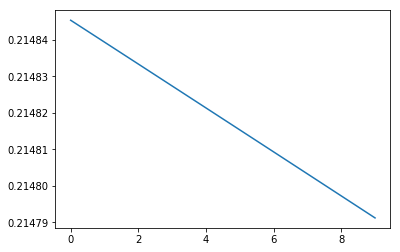

In [137]:
plt.plot(iters,loss_curve)

In [138]:
feed_forward([1,1,0],w0,w1,w2,b0,b1,b2)

([1, 1, 0],
 array([[0.30344906, 0.28189064, 0.14566736, 0.16483031]]),
 array([[0.28480366, 0.29894731]]),
 array([[0.69469908]]))